### Análise Exploratória da base
Este notebook tem como objetivo compreender e preparar a base de dados para que seja utilizada em modelos de machine learning

In [155]:
# Importando bibliotecas e a base para manipulação
import pandas as pd
import seaborn as sns

In [145]:
df = pd.read_csv("../data/high_popularity_spotify_data.csv", sep=',',  encoding='utf-8')

In [146]:
data = {}
for column_name in df:
    data[column_name] = {
        "type": df[column_name].dtype,
        "null_count": df[column_name].isnull().sum()
    }

info_df = pd.DataFrame(data)
info_df

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
type,float64,float64,float64,object,float64,float64,float64,object,int64,float64,...,float64,object,int64,int64,int64,float64,object,object,object,object
null_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Com base no resultado acima, algumas colunas podem ser retiradas porque os dados que carregam não são relevantes para nós, ou por conta de serem dados puramente técnicos sobre a composição da canção, ou são valores únicos

In [147]:
columns_to_remove = ["track_href", "track_album_name", "playlist_name", "analysis_url", "track_id", "track_album_id", "playlist_subgenre", "key"]
for column_name in columns_to_remove:
    if(column_name in df): del df[column_name]

In [148]:
row_count, column_count = df.shape
print(f"A base de dados possui {row_count} linhas e {column_count} colunas")
for column_name in df:
    column_data = df[column_name]
    column_type = column_data.dtype
    print(f"---------\n'{column_name}' ({column_type})")
    data_example = ""
    if column_type in ["int64", "float64"]: data_example = f"\t- Média: {round(column_data.mean(), 2)}\n\t- Mediana: {round(column_data.median(), 2)}\n\t- Valor Mínimo: {round(column_data.min(), 3)}\n\t- Valor Máximo: {round(column_data.max(), 3)}"
    else: data_example = f"Valores: {column_data[0]}"

    print(data_example)

A base de dados possui 1686 linhas e 21 colunas
---------
'energy' (float64)
	- Média: 0.67
	- Mediana: 0.69
	- Valor Mínimo: 0.002
	- Valor Máximo: 0.99
---------
'tempo' (float64)
	- Média: 121.07
	- Mediana: 120.0
	- Valor Mínimo: 49.305
	- Valor Máximo: 209.688
---------
'danceability' (float64)
	- Média: 0.65
	- Mediana: 0.66
	- Valor Mínimo: 0.136
	- Valor Máximo: 0.979
---------
'playlist_genre' (object)
Valores: pop
---------
'loudness' (float64)
	- Média: -6.7
	- Mediana: -5.97
	- Valor Mínimo: -43.643
	- Valor Máximo: 1.295
---------
'liveness' (float64)
	- Média: 0.17
	- Mediana: 0.12
	- Valor Mínimo: 0.021
	- Valor Máximo: 0.95
---------
'valence' (float64)
	- Média: 0.53
	- Mediana: 0.53
	- Valor Mínimo: 0.035
	- Valor Máximo: 0.978
---------
'track_artist' (object)
Valores: Lady Gaga, Bruno Mars
---------
'time_signature' (int64)
	- Média: 3.95
	- Mediana: 4.0
	- Valor Mínimo: 1
	- Valor Máximo: 5
---------
'speechiness' (float64)
	- Média: 0.1
	- Mediana: 0.06
	- Valor M

In [149]:
df = df.sort_values(["track_popularity"], ascending=False)
df["mode"] = df["mode"].replace({1: "major", 0: "minor"})
df

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,uri,track_name,track_album_release_date,instrumentalness,mode,duration_ms,acousticness,id,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.00000,minor,251668,0.3080,2plbrEY59IikOBgBGLjaoe,audio_features,37i9dQZF1DXcBWIGoYBM5M
455,0.592,157.969,0.521,gaming,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.00000,minor,251668,0.3080,2plbrEY59IikOBgBGLjaoe,audio_features,37i9dQZF1DWTyiBJ6yEqeu
676,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.00000,minor,251668,0.3080,2plbrEY59IikOBgBGLjaoe,audio_features,37i9dQZEVXbMDoHDwVN2tF
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.00000,minor,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,audio_features,37i9dQZF1DXcBWIGoYBM5M
677,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.00000,minor,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,audio_features,37i9dQZEVXbMDoHDwVN2tF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.485,100.053,0.843,latin,-8.735,0.1070,0.689,"Drake, Tems",4,0.1950,...,spotify:track:08XWh5c0BMyD1nKVxxl91z,Fountains (with Tems),2021-09-03,0.06750,minor,192418,0.1810,08XWh5c0BMyD1nKVxxl91z,audio_features,0oU30cCr8klmMsuOKHDLkh
1654,0.807,155.397,0.525,electronic,-6.366,0.0504,0.741,Zaz,4,0.0725,...,spotify:track:734dz1YaFITwawPpM25fSt,Je veux,2010-05-10,0.00000,minor,215933,0.2510,734dz1YaFITwawPpM25fSt,audio_features,58zteW83Lvl8e158fCCFVN
1663,0.638,109.960,0.701,electronic,-9.061,0.2790,0.646,Stromae,4,0.1650,...,spotify:track:6M4nkEPZMj58acftDRTuKL,Tous les mêmes,2013-01-01,0.00219,minor,210933,0.2230,6M4nkEPZMj58acftDRTuKL,audio_features,58zteW83Lvl8e158fCCFVN
1653,0.797,97.988,0.811,electronic,-5.428,0.1120,0.541,Aya Nakamura,4,0.1650,...,spotify:track:7sKDftgGirHWTVFMtJoDoh,Djadja,2018-11-02,0.00000,major,171133,0.0617,7sKDftgGirHWTVFMtJoDoh,audio_features,58zteW83Lvl8e158fCCFVN


In [150]:
if "uri" in df: 
    df = df.drop_duplicates(subset=['uri'], keep='first').sort_values(["track_popularity"], ascending=False)
    del df["uri"] # uri só tinha utilidade para remover as duplicatas
df[["track_popularity", "track_name", "playlist_genre", "duration_ms", "energy", "tempo", "danceability", "loudness", "liveness", "valence", "speechiness", "instrumentalness", "acousticness", "mode", "time_signature"]]

,track_popularity,track_name,playlist_genre,duration_ms,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,acousticness,mode,time_signature
0,100,Die With A Smile,pop,251668,0.592,157.969,0.521,-7.777,0.1220,0.535,0.0304,0.000000,0.3080,minor,3
4,98,APT.,pop,169917,0.783,149.027,0.777,-4.477,0.3550,0.939,0.2600,0.000000,0.0283,minor,4
456,97,BIRDS OF A FEATHER,gaming,210373,0.507,104.978,0.747,-10.171,0.1170,0.438,0.0358,0.060800,0.2000,major,4
688,94,"Good Luck, Babe!",pop,218424,0.582,116.712,0.700,-5.960,0.0881,0.785,0.0356,0.000000,0.0502,minor,4
1250,93,Sailor Song,folk,211979,0.413,94.938,0.494,-10.432,0.1930,0.273,0.0254,0.000067,0.6820,major,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,68,Fountains (with Tems),latin,192418,0.485,100.053,0.843,-8.735,0.1070,0.689,0.1950,0.067500,0.1810,minor,4
1654,68,Je veux,electronic,215933,0.807,155.397,0.525,-6.366,0.0504,0.741,0.0725,0.000000,0.2510,minor,4
1663,68,Tous les mêmes,electronic,210933,0.638,109.960,0.701,-9.061,0.2790,0.646,0.1650,0.002190,0.2230,minor,4
1653,68,Djadja,electronic,171133,0.797,97.988,0.811,-5.428,0.1120,0.541,0.1650,0.000000,0.0617,major,4


[Text(0.5, 1.0, 'Matriz de Correlação (músicas com alta popularidade)')]

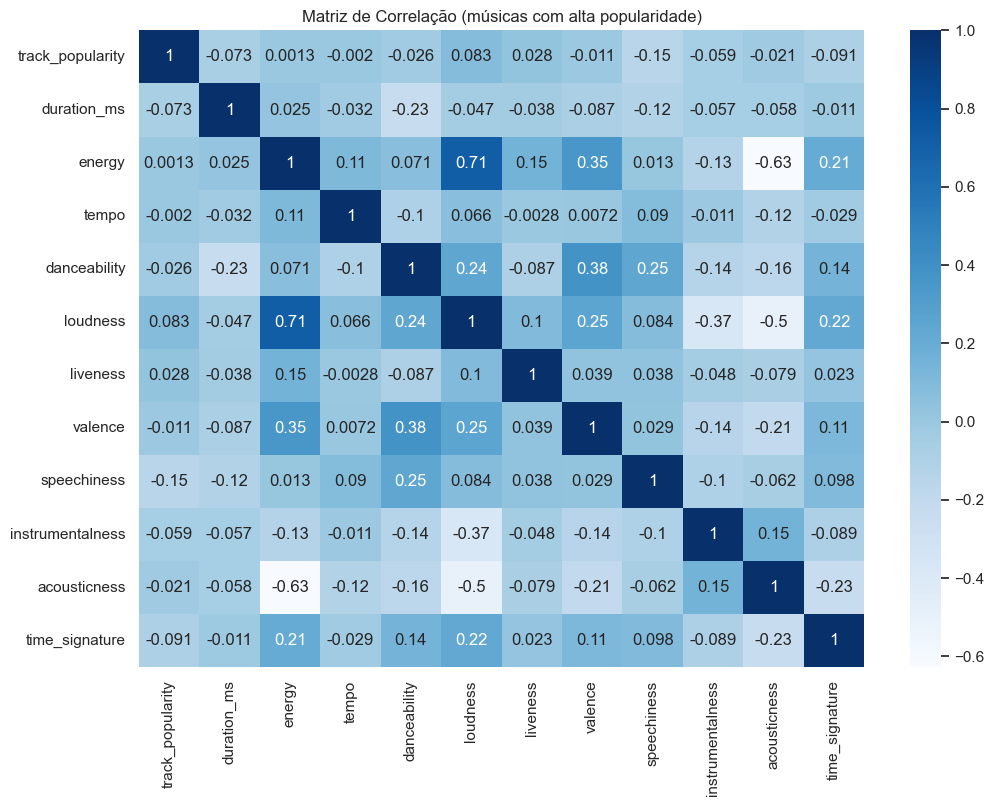

In [161]:
correlation_data = df[["track_popularity", "duration_ms", "energy", "tempo", "danceability", "loudness", "liveness", "valence", "speechiness", "instrumentalness", "acousticness", "time_signature"]].corr()
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation_data, cmap="Blues", annot=True).set(title="Matriz de Correlação (músicas com alta popularidade)")